In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [3]:
churn_data = pd.read_csv("book3.csv")
churn_data.head()

,Threshold,Probability,Accuracy,Sensitivity,Specificity
0,0.0,0.0,0.21,1.00,0.00
1,0.1,0.1,0.39,0.96,0.22
2,0.2,0.2,0.56,0.88,0.49
3,0.3,0.3,0.59,0.81,0.53
4,0.4,0.4,0.62,0.78,0.63


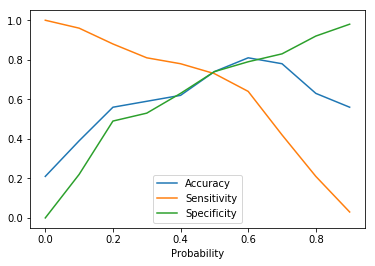

In [6]:
churn_data.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [9]:
churn_data = pd.read_csv("gq-4.csv")
churn_data.head()



,Patient ID,heart_diesease,prob,Predicted_Label
0,1001,0,0.34,0
1,1002,1,0.58,1
2,1003,1,0.79,1
3,1004,0,0.68,1
4,1005,0,0.21,0


In [14]:
numbers = [0.45, 0.5, 0.55, 0.6]
for i in numbers:
    churn_data[i]= churn_data.prob.map(lambda x: 1 if x > i else 0)
churn_data.head(10)

,Patient ID,heart_diesease,prob,Predicted_Label,0.45,0.5,0.55,0.6
0,1001,0,0.34,0,0,0,0,0
1,1002,1,0.58,1,1,1,1,0
2,1003,1,0.79,1,1,1,1,1
3,1004,0,0.68,1,1,1,1,1
4,1005,0,0.21,0,0,0,0,0
5,1006,0,0.04,0,0,0,0,0
6,1007,1,0.48,0,1,0,0,0
7,1008,1,0.64,1,1,1,1,1
8,1009,0,0.61,1,1,1,1,1
9,1010,1,0.86,1,1,1,1,1


In [13]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.45, 0.5, 0.55, 0.6]
for i in num:
    cm1 = metrics.confusion_matrix(churn_data.heart_diesease, churn_data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.45  0.45       0.8    1.0    0.6
0.50  0.50       0.7    0.8    0.6
0.55  0.55       0.7    0.8    0.6
0.60  0.60       0.6    0.6    0.6
